# BOTTOM SLOPE CALCULATION


##Google Colab Drive Connection

In [3]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/MyDrive/Dissipation/

Mounted at /gdrive
/gdrive/MyDrive/Dissipation


In [4]:
%cd data/locations/

/gdrive/MyDrive/Dissipation/data/locations


In [5]:
!ls *dof

08100100.dof  08271000.dof  09131000.dof  09301300.dof	10171300.dof
08100400.dof  08271300.dof  09131300.dof  09301600.dof	10171600.dof
08101300.dof  08271600.dof  09131600.dof  09301900.dof	10171900.dof
08101600.dof  08271900.dof  09131900.dof  09302200.dof	10172200.dof
08101900.dof  08272200.dof  09132200.dof  10010100.dof	10180100.dof
08102200.dof  08280100.dof  09140100.dof  10010400.dof	10180400.dof
08110100.dof  08280400.dof  09140400.dof  10010700.dof	10180700.dof
08110400.dof  08280700.dof  09140700.dof  10011000.dof	10181000.dof
08110700.dof  08281000.dof  09141000.dof  10011300.dof	10181300.dof
08111000.dof  08281300.dof  09141300.dof  10011600.dof	10181600.dof
08111300.dof  08281600.dof  09141600.dof  10011900.dof	10181900.dof
08111900.dof  08281900.dof  09141900.dof  10012200.dof	10182200.dof
08112200.dof  08282200.dof  09142200.dof  10020100.dof	10190100.dof
08120100.dof  08290100.dof  09150100.dof  10020400.dof	10190400.dof
08120400.dof  08290400.dof  09150400.dof  100207

In [6]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
from statistics import mean

In [7]:
nb = []
for i in range(1, 100):
	nb.append('p' + str(i).zfill(2))

In [8]:
col =['Gauge','x','y','d','z']
df_loc = pd.read_csv('08100100.dof', names=col, sep='     ')
#df_loc2 = pd.DataFrame(data=df_loc, index=nb)
#df_loc2
df_loc = df_loc.sort_values(by=['Gauge']).head(17)
df_loc
# df_loc.reindex(range(0,18))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


,Gauge,x,y,d,z
18,p01,124.94,929.82,54.0,77.5600
20,p02,135.01,928.88,-31.0,-13.7327
25,p03,145.42,929.56,-92.0,-79.9787
30,p04,160.77,929.36,-58.0,-124.7380
0,p05,169.50,928.44,-63.0,-144.3810
42,p12,205.34,929.17,-104.0,-176.9710
47,p13,220.23,929.13,-134.0,-190.9730
52,p14,240.55,928.72,-163.0,-219.3620
57,p15,252.03,929.06,-190.0,-237.5780
62,p16,295.80,929.94,-315.0,-316.7810


In [9]:
df_loc = df_loc.reset_index()

In [10]:
df_loc = df_loc.iloc[:, 2:]
df_loc

,x,y,d,z
0,124.94,929.82,54.0,77.5600
1,135.01,928.88,-31.0,-13.7327
2,145.42,929.56,-92.0,-79.9787
3,160.77,929.36,-58.0,-124.7380
4,169.50,928.44,-63.0,-144.3810
5,205.34,929.17,-104.0,-176.9710
6,220.23,929.13,-134.0,-190.9730
7,240.55,928.72,-163.0,-219.3620
8,252.03,929.06,-190.0,-237.5780
9,295.80,929.94,-315.0,-316.7810


In [11]:
d = df_loc.iloc[:, 2]
z = df_loc.iloc[:, 3]
x = df_loc.iloc[:, 0]
surface = d-z
x, surface

(0     124.94
 1     135.01
 2     145.42
 3     160.77
 4     169.50
 5     205.34
 6     220.23
 7     240.55
 8     252.03
 9     295.80
 10    320.37
 11    398.39
 12    480.34
 13    190.20
 14    190.20
 15    370.08
 16    884.11
 Name: x, dtype: float64, 0    -23.5600
 1    -17.2673
 2    -12.0213
 3     66.7380
 4     81.3810
 5     72.9710
 6     56.9730
 7     56.3620
 8     47.5780
 9      1.7810
 10    64.9920
 11    55.7200
 12    58.9240
 13    59.2620
 14    59.2620
 15   -25.6130
 16     6.0000
 dtype: float64)

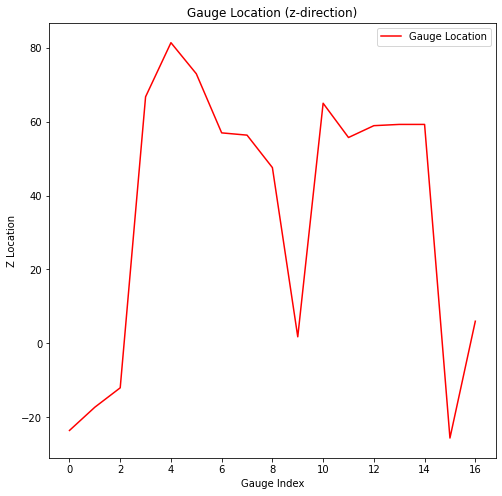

In [12]:
plt.figure(figsize=(8,8))
plt.plot(surface, color='r', label='Gauge Location')
plt.title("Gauge Location (z-direction)")
plt.xlabel("Gauge Index")
plt.ylabel("Z Location")
plt.legend()
plt.show()

In [13]:
x2 = x.copy()
for i in range(len(x)):
  if i == 0:
    x2[i] = x[1]-x[0]
  elif i == 16:
    x2[i] = x[i]
  else:
    x2[i] = x[i+1]-x[i]
x2 = x2[0:16]
surface = surface[0:16]

In [14]:
tan = surface/x2
angle = np.arctan(tan)

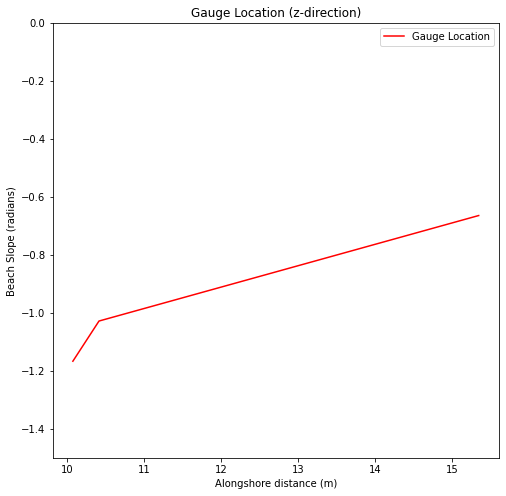

In [15]:
plt.figure(figsize=(8,8))
plt.plot(x2[0:3], angle[0:3], color='r', label='Gauge Location')
plt.title("Gauge Location (z-direction)")
plt.xlabel("Alongshore distance (m)")
plt.ylabel("Beach Slope (radians)")
plt.ylim(-1.5, 0)
plt.legend()
plt.show()

In [17]:
print ('Average bottom slope is', mean(angle))

Average bottom slope is 0.4709203058245915
